In [1]:
#import libraries
#numpy library
import numpy as np
#pandas library
import pandas as pd
#visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#tensor flow library
import tensorflow as tf
#keras library
import keras as kr
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load dataset
df=pd.read_csv('iris.csv')

In [3]:
#to show first 5 record
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#to show no of rows and columns
df.shape

(150, 5)

In [5]:
#check columns names
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#check dataset balance or not balanved
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

thus,dataset is balances dataset

In [7]:
#to check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#check data type of columns
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

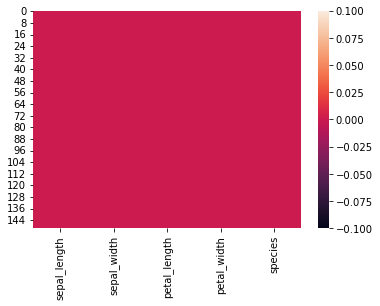

In [9]:
#visulization
sns.heatmap(df.isnull())
plt.show()

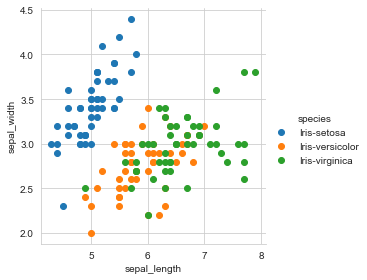

In [10]:
#2d scatterplot
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="species",size=4).map(plt.scatter,"sepal_length","sepal_width").add_legend();
plt.show()

# Data Investigation and Classification
Before trying to create a model for our Neural Network we first need to investigate our data and determine what will be the inputs and what will be our outputs. 

The CSV file provided contains 5 columns with:

Sepal Length

Sepal Width

Petal Length

Petal Width

Species

Judging by the fact that we are trying to make predictions we must split our data set into sets of:

Inputs - Numerical data values

Outputs - Classification of Iris Flower species

Now that we have the data set loaded we can extract the data we need into appropriate data sets in preparation for training and testing our Model.

In [11]:
# The inputs are four floats: sepal length, sepal width, petal length, petal width.
inputs  = np.array(df)[:,:4].astype(np.float)

# Outputs are initially individual strings: setosa, versicolor or virginica.
outputs = np.array(df)[:,4]

# Convert the output strings to ints.
outputs_vals, outputs_ints = np.unique(outputs, return_inverse=True)

# Categorical Classification

Here we are using the Keras utility to_categorical() to allow us to turn our output categories into binary class matrices. 

This is often refered to as "One-Hot" encoding. 

This is for use with categorical_crossentropy and classification of our species (setosa, versicolor and virginica).

Each Species will be represented as a binary class matrix.

Setosa [1 0 0]

Versicolor [0 1 0]

Virginica [0 0 1]

In [12]:
# Encode the category integers as binary categorical vairables.
outputs_cats = kr.utils.to_categorical(outputs_ints)

# Splitting the data

We can now randomly split the data into two sets for:

    Training

    Testing

In [13]:
# Split the input and output data sets into training and test subsets.
inds = np.random.permutation(len(inputs))
train_inds, test_inds = np.array_split(inds, 2)
inputs_train, outputs_train = inputs[train_inds], outputs_cats[train_inds]
inputs_test,  outputs_test  = inputs[test_inds],  outputs_cats[test_inds]

# Creating a Model

In [14]:
# Create a neural network.
model = kr.models.Sequential()

# Add an initial layer with 4 input nodes, and a hidden layer with 16 nodes.
model.add(kr.layers.Dense(16, input_shape=(4,)))
# Apply the sigmoid activation function to that layer.
model.add(kr.layers.Activation("sigmoid"))
# Add another layer, connected to the layer with 16 nodes, containing three output nodes.
model.add(kr.layers.Dense(3))
# Use the softmax activation function there.
model.add(kr.layers.Activation("softmax"))

# Activation Functions

In [15]:
# Display our Model using the summary function
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


# Configure the Model for training and fit the training data

In [16]:
# Configure the model for training.
# Uses the adam optimizer and categorical cross entropy as the loss function.
# Add in some extra metrics - accuracy being the only one.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model using our training data.
model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
75/75 [==============================] - 1s 1ms/step - loss: 1.3488 - accuracy: 0.3200
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 1.1054 - accuracy: 0.3200
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0304 - accuracy: 0.5333
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9943 - accuracy: 0.6667
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9609 - accuracy: 0.6667
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.9336 - accuracy: 0.6667
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9034 - accuracy: 0.6667
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8693 - accuracy: 0.8000
Epoch 9/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8345 - accuracy: 0.6933
Epoch 10/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8022 - accuracy: 0.6800
Epoch 11/

75/75 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9600
Epoch 83/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1797 - accuracy: 0.9467
Epoch 84/100
75/75 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9600
Epoch 85/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1774 - accuracy: 0.9467
Epoch 86/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 0.9467
Epoch 87/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.9733
Epoch 88/100
75/75 [==============================] - 0s 972us/step - loss: 0.1680 - accuracy: 0.9600
Epoch 89/100
75/75 [==============================] - 0s 973us/step - loss: 0.1651 - accuracy: 0.9600
Epoch 90/100
75/75 [==============================] - 0s 972us/step - loss: 0.1648 - accuracy: 0.9733
Epoch 91/100
75/75 [==============================] - 0s 988us/step - loss: 0.1632 - accuracy: 0.9600
Epoch

# Evaluate the Loss and Accuracy of the Model

In [17]:
# Evaluate the model using the test data set.
loss, accuracy = model.evaluate(inputs_test, outputs_test, verbose=1)

# Output the accuracy of the model.
print("\n\nLoss: %6.4f\tAccuracy: %6.4f" % (loss, accuracy))

3/3 [==============================] - 0s 0s/step - loss: 0.1463 - accuracy: 0.9733


Loss: 0.1463	Accuracy: 0.9733


# Making predictions using the Model

In [18]:
# Predict the class of a single flower.
prediction = np.around(model.predict(np.expand_dims(inputs_test[0], axis=0))).astype(np.int)[0]

print("Actual: %s\tEstimated: %s" % (outputs_test[0].astype(np.int), prediction))
print("That means it's a %s" % outputs_vals[prediction.astype(np.bool)][0])

1/1 [==============================] - 0s 64ms/step
Actual: [0 0 1]	Estimated: [0 0 1]
That means it's a Iris-virginica
